Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **48 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Liuda Serohina"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Hiring problem and random variables

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1 [time estimate: 5 minutes]
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [6]:
def hire_assistant(applicants):
    """
    This function should output the number of assistants hired.
    
    Parameters
    ----------
    applicants : list
        A list of the numbers that represent the level of qualification of 
        the applicants; the higher the number, the better qualified.
        
    Returns
    -------
    hires : int
        Number of assistants hired.
    
    """
    best = -float('inf') #set the best qualifications to negative infinity
    new_hires = 0 #initialize new_hires to update later
    for i in applicants: #iterate over candidates
        if i > best: #if the level of qualification is > than best
            best = i #update best
            new_hires += 1 #update the number of new_hires
    return new_hires
            

In [7]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2 [time estimate: 5 minutes]

Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [8]:
import random
def experimental_hires(N):
    """
    This function outputs the average number of assistants hired.
    
    Parameters
    ---
    N : number of applicants
    
    Returns
    ---
    average : average number of hires per number of applicants
    """
    new_hires = 0 #initialize new_hires to update later
    for i in range(10000): #iterate over 10,000 applicants
        best = -float('inf') #set the best quality to negative infinity
        candidates = [random.uniform(0,1) for i in range (N)] #assign qualities to applicants from 0 to 1
        for j in candidates: #iterate over candidates' qualities
            if j > best: #if the quality is > than best
                best = j #update best
                new_hires += 1 #update the number of new_hires
    average = new_hires/10000 #calculate the average number of hires
    return average

In [9]:
experimental_hires(2000)

8.2008

## Question 3 [time estimtate: 10 minutes]

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [10]:
def analytical_hires(N):
    """
    This function returns the analytical expected number of
    hires if there are N applicants
    
    Parameters
    ----------
    N : int
        Number of applicants
        
    Returns
    -------
    hires : float
        Average number of assistants hired
    
    Note
    ----
    From the textbook, we know that the analytical result is
    
        1 + 1/2 + 1/3 + ... + 1/N
        
    """
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

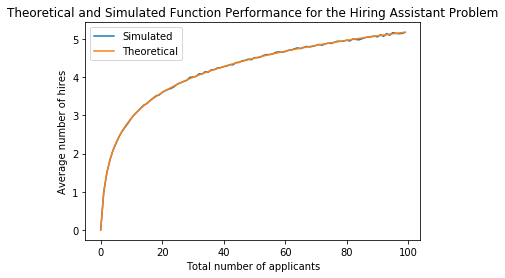

In [14]:
import matplotlib.pyplot as plt #import matplotlib for plotting
%matplotlib inline 
x = [i for i in range(100)] #set the range for generating
experimental = [] #create an empty storage list for experimental
analytical = [] #create an empty storage list for analytical
for i in x: #iterate over x and add the generated values to experimental and analytical lists
    experimental.append(experimental_hires(i))
    analytical.append(analytical_hires(i))
plt.plot(x, experimental, label = "Simulated") #plot the silumulated
plt.plot(x, analytical, label = "Theoretical") #plot the theorietical
plt.xlabel("Total number of applicants") #add the Xlabel
plt.ylabel("Average number of hires") #add the Ylabel
plt.title("Theoretical and Simulated Function Performance for the Hiring Assistant Problem") #add title
plt.legend() #add legend
plt.show()

## Question 4 [time estimate: 10 minutes]

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

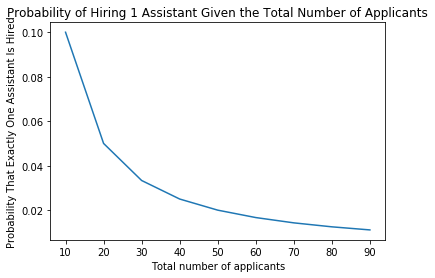

In [36]:
%matplotlib inline
x = [i for i in range(10, 100, 10)] #set the range for generating
probability = [] #create an empty storage list for probabilities
for i in x: #iterate over x to generate probabilities
    probability.append(1/i) #add probability to the empty list
plt.plot(x, probability) #plot the probabilities
plt.xlabel("Total number of applicants") #add Xlabel
plt.ylabel("Probability That Exactly One Assistant Is Hired") #add Ylabel
plt.title("Probability of Hiring 1 Assistant Given the Total Number of Applicants") #add title
plt.show()

## [Optional] Question 5 [time estimate: 15 minutes]
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1 [time estimate: 3 minutes]
Knowing that everyone’s hats are unique and every guest has a hat, do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

Probably yes since the coat check attendant randomly returns hats to visitors.

## Question 2 [time estimate: 3 minutes]

Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants
```
**Command 1.**
```
hat_list = [np.random.integers(0,n) for i in range(n)]
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2 starts with a regular list and then randomly shuffles it to generate a random sample.

## Question 3 [time estimate: 5 minutes]

Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [15]:
import numpy as np #import numpy
def hat_check(N):
    """
    This function returns the number of hats correctly returned.
    
    Parameters
    ----------
    N : int
        Number of party attendants
        
    Returns
    -------
    hat_return : int
        Number of hats correctly returned
    
    """
    hat_list = list(range(N)) #make a list with the party attendees
    np.random.shuffle(hat_list) #randomly shuffle the list (mixing up the hats)
    hat_return = 0 #initialize correct hat return
    for i in range(N): #iterate over the number of party attendees
        if i == hat_list[i]: #if the value is the same as the first value of original list
            hat_return += 1 #update hat_return (hat returned correctly)
    return hat_return

In [40]:
hat_check(40)

1

## Question 4 [time estimate: 7 minutes]

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

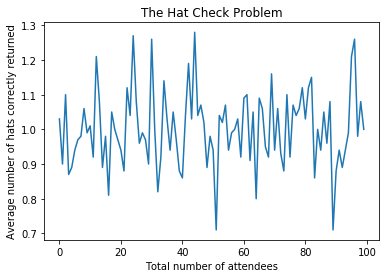

In [43]:
%matplotlib inline
party_attendees = [i for i in range(100)] #set the range for generating values
average_return = [] #create an empty list to update later
for i in party_attendees: 
    median_correct_return = 0 #initialize the average hats returned correctly
    for i in range(100): #iterate 100 times
        median_correct_return += hat_check(i) #update the average using hat_check()
    average_return.append(median_correct_return/100) #add the average values to the storage list

plt.plot(party_attendees, average_return) #plot the number of attendees and average hats returned correctly
plt.xlabel("Total number of attendees") #add Xlabel
plt.ylabel("Average number of hats correctly returned") #add Ylabel
plt.title("The Hat Check Problem") #add title
plt.show()

## [Optional] Question 5 [time estimate: 15 minutes]

As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE